## Loading Data

I'll use preprocessed files that Markus provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data_path = r'../Data/speech_data/speech_train_set.csv'
val_data_path = r'../Data/speech_data/speech_validation_set.csv'
feature_path = r'../Data/speech_data/indixes_speech.csv'
print("Start Program")
dataset_train = pd.read_csv(train_data_path)
print("Loaded training set")
dataset_val = pd.read_csv(val_data_path)
print("Loaded validation set")
features = pd.read_csv(feature_path)
print("Loaded features")

Start Program
Loaded training set
Loaded validation set
Loaded features


In [3]:
print(dataset_train.shape)
print(dataset_val.shape)

(144388, 105)
(53129, 105)


In [4]:
# Shuffle
dataset_train = dataset_train.sample(frac=1)
# extract target vector
y_train = np.array(dataset_train.iloc[:, -1])
# Undersampling
non_music = dataset_train[y_train == 0]
music = dataset_train[y_train == 1][:len(dataset_train[y_train == 0])]
dataset_train = music.append(non_music, ignore_index=True).sample(frac=1)
# get new-sized vector
y_train = np.array(dataset_train.iloc[:, -1])
y_val = np.array(dataset_val.iloc[:, -1])
print("Undersampled training data")
print(dataset_train.shape)

### Load PCA ###
X_train_pca = pd.read_csv(r'../Data/speech_preprocessed/speech_train_pca.csv')
y_train_pca = np.array(X_train_pca.iloc[:, -1])
# undersampling
non_music = X_train_pca[y_train_pca == 0]
music = X_train_pca[y_train_pca == 1][:len(X_train_pca[y_train_pca == 0])]
X_train_pca = music.append(non_music, ignore_index=True).sample(frac=1)
y_train_pca = np.array(X_train_pca.iloc[:, -1])
X_train_pca = X_train_pca.iloc[:,:-1].values
print("Loaded PCA training set")

X_val_pca = pd.read_csv(r'../Data/speech_preprocessed/speech_validation_pca.csv').values
y_val_pca = X_val_pca[:,-1]
X_val_pca = X_val_pca[:,:-1]
print("Loaded PCA validation set")

Undersampled training data
(144388, 105)
Loaded PCA training set
Loaded PCA validation set


## Train on original features

In [5]:
features

,RF,SVM,RForSVM,RFandSVM
0,f000000,f000000,f000000,f000000
1,f000009,f000001,f000001,f000009
2,f000039,f000002,f000002,f000039
3,f000046,f000003,f000003,f000046
4,f000048,f000004,f000004,f000048
5,f000049,f000005,f000005,f000049
6,f000050,f000007,f000007,f000050
7,f000053,f000009,f000009,f000053
8,f000054,f000010,f000010,f000054
9,f000055,f000012,f000012,f000055


The first feature `f000000` is apparantly mistyped or something because there isn't such a feature. For the time being, I ignored it.

In [6]:
import handsomUtility
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix

|Training on RF
Confusion Matrix: [0.50533607 0.03284459 0.07255924 0.3892601 ]
Accuracy: 0.8945961715823749


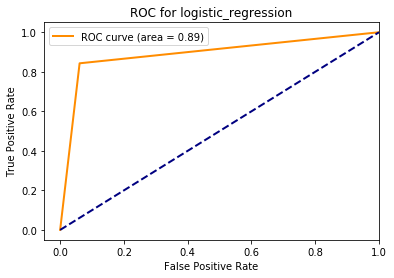

Confusion Matrix: [0.5088558  0.02932485 0.06013665 0.4016827 ]
Accuracy: 0.9105385006305408


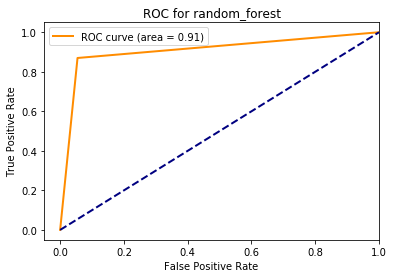

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50569369 0.03248697 0.05528054 0.4065388 ]
Accuracy: 0.9122324907301097


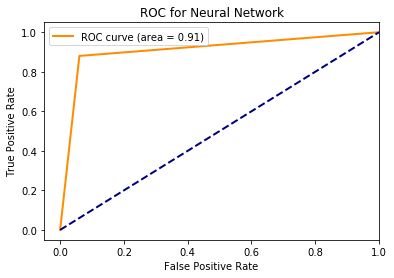

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50838525 0.0297954  0.05855559 0.40326375]
Accuracy: 0.9116490052513693


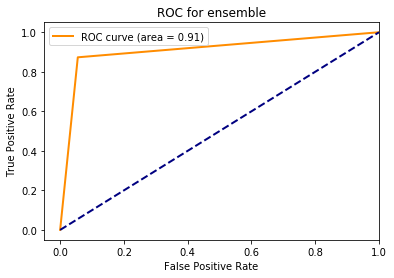

|Training on SVM
Confusion Matrix: [0.50431967 0.03386098 0.06830545 0.3935139 ]
Accuracy: 0.8978335748837735


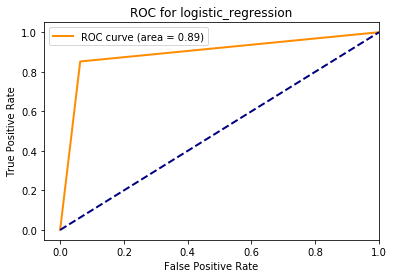

Confusion Matrix: [0.50872405 0.02945661 0.0554123  0.40640705]
Accuracy: 0.9151310960115944


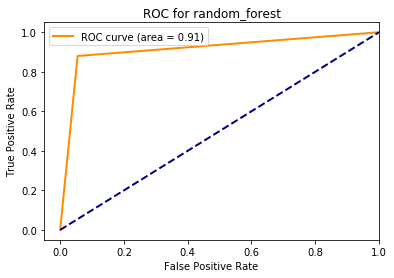

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.51032393 0.02785673 0.05891321 0.40290613]
Accuracy: 0.9132300626776337


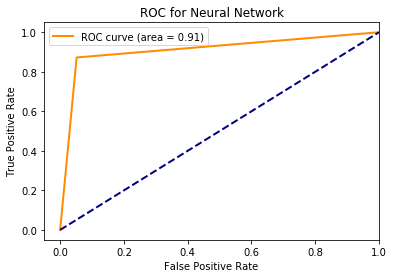

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.51117092 0.02700973 0.05646634 0.40535301]
Accuracy: 0.9165239323156845


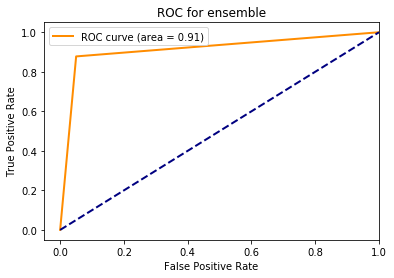

|Training on RForSVM
Confusion Matrix: [0.50431967 0.03386098 0.06830545 0.3935139 ]
Accuracy: 0.8978335748837735


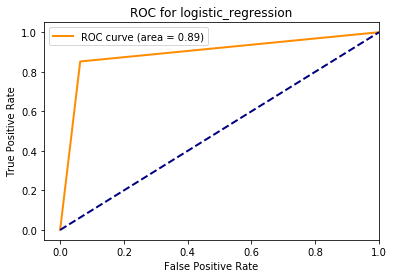

Confusion Matrix: [0.50872405 0.02945661 0.0554123  0.40640705]
Accuracy: 0.9151310960115944


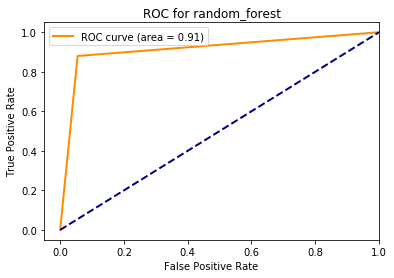

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.51032393 0.02785673 0.05891321 0.40290613]
Accuracy: 0.9132300626776337


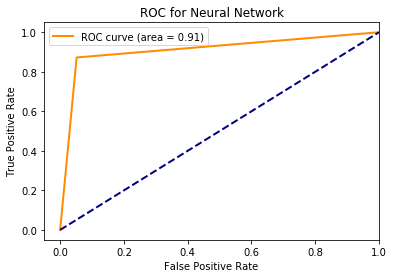

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.51117092 0.02700973 0.05646634 0.40535301]
Accuracy: 0.9165239323156845


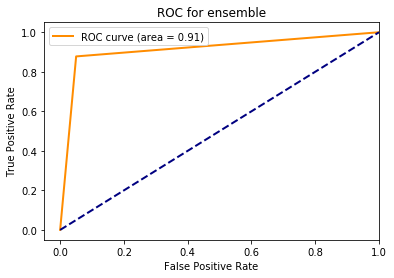

|Training on RFandSVM
Confusion Matrix: [0.50533607 0.03284459 0.07255924 0.3892601 ]
Accuracy: 0.8945961715823749


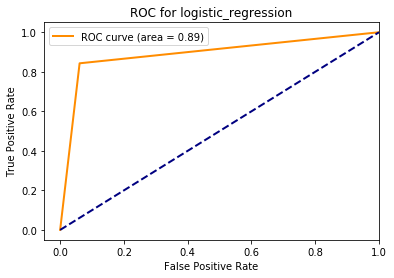

Confusion Matrix: [0.5088558  0.02932485 0.06013665 0.4016827 ]
Accuracy: 0.9105385006305408


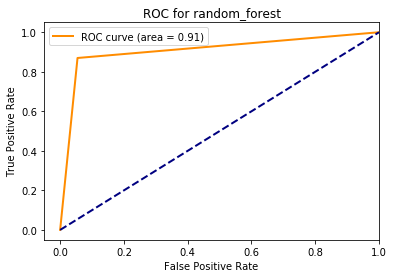

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50569369 0.03248697 0.05528054 0.4065388 ]
Accuracy: 0.9122324907301097


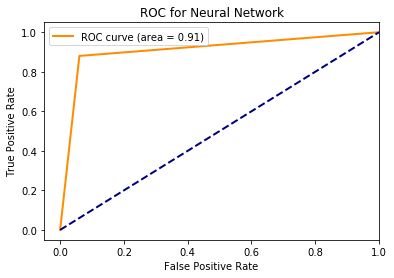

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50838525 0.0297954  0.05855559 0.40326375]
Accuracy: 0.9116490052513693


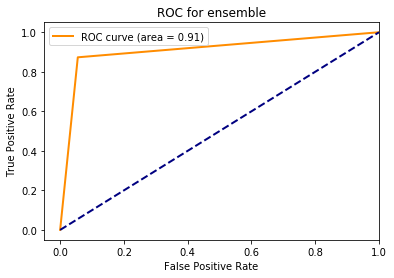

In [7]:
for column in features:
    f = features[column].dropna().tolist()
    # add one to each feature index
#     f = ["f{:06}".format(int(re.findall(r"\d+", feature)[0])+1) for feature in f]
    # remove the first feature, because there isn't such f000001
    f = f[1:]
    print("===============================")
    print("|Training on {}".format(column))
    print("===============================")
    X_train = dataset_train[f].values
    X_val = dataset_val[f].values
    
    # for all four model types, train on the selected features
    for classifier, name in handsomUtility.getClassifiers():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_val)
        print("Confusion Matrix: {}".format(confusion_matrix(y_val, y_pred).ravel()/len(y_pred)))
        print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
        handsomUtility.plotROC(y_val, y_pred, name)

## Train on PCA

Confusion Matrix: [0.46191346 0.0762672  0.04590713 0.41591221]
Accuracy: 0.8778256695966421


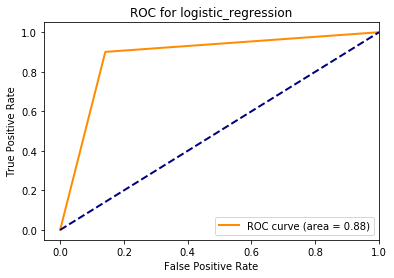

Confusion Matrix: [0.50034821 0.03783245 0.05804739 0.40377195]
Accuracy: 0.9041201603643961


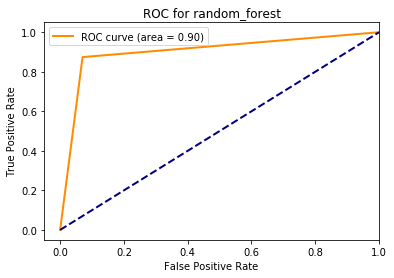

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50838525 0.0297954  0.10775659 0.35406275]
Accuracy: 0.8624480039149993


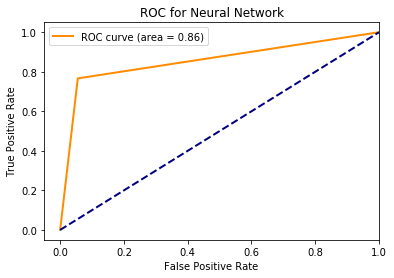

/Users/kareem/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix: [0.50625835 0.0319223  0.08891566 0.37290369]
Accuracy: 0.8791620395640799


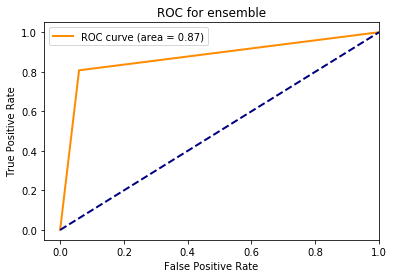

In [9]:
for classifier, name in handsomUtility.getClassifiers():
    classifier.fit(X_train_pca, y_train_pca)
    y_pred = classifier.predict(X_val_pca)
    print("Confusion Matrix: {}".format(confusion_matrix(y_val, y_pred).ravel()/len(y_pred)))
    print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))
    handsomUtility.plotROC(y_val, y_pred, name)

We obtain a lower AUC for all models respectively. I.e. all models learn better on original features than on principle components.